# Aviation Project

## Project Goal

The goal of this project is to determine which aircraft have the lowest risk for the company to start a new aerospace enterprise with.
The project will make recommendations for both commercial and private aircraft.

# Data Understanding

In this project I will work an Aviation Incident dataset found on [Kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses)

# Business Understanding

1. What is the safest plane for commercial enterprise?
2. What is the safest plane for private enterprise?
3. 3 Concrete recommendations for the company.

In [28]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns

20

In [29]:
#read in the data with pandas
aviation_data_original = pd.read_csv('Data/Aviation_Data.csv', low_memory=False) 
                 #dtype={"Latitude":"str", "Longitude":"str","Broad.phase.of.flight":"str"}) 

In [30]:
#Make a copy of the dataframe to work on and leave original unaltered.
aviation_data = aviation_data_original.copy()

In [31]:
aviation_data.shape
#There are 90,348 rows, each one being an aviation incident, with 31 columns containing details about the incident.

(90348, 31)

In [32]:
#A cursory look at column names, types, and columns with missing values.
# I see most columns are strings except 'Number of Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries' and 'Total.Uninjured' are numerical floats.
#I see a lot of missing values. The only column without missing values is Investigation.Type. But Event.Id, Accident.Number, and Event.Date have almost no values and may serve as good indices.
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [35]:
#Number of missing values in each column
aviation_data.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [36]:
#Taking a look at the head and tail of the dataframe
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [37]:
aviation_data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [38]:
#Statistics for the 5 numerical columns
aviation_data.describe()

#The average Number of Engines is just over 1, with the max of 8. The IQR of number of engines is all within 1. Most data is about 1 engine aircraft.
#Injuries columns means are below 1 but contain very high maximums. The bulk of the data in in the IQR have zero injuries.

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [39]:
aviation_data.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [40]:
#Converting Event.Date column to datetime and adding month and year columns
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'])
aviation_data['Month'] = aviation_data['Event.Date'].dt.month
aviation_data['Year'] = aviation_data['Event.Date'].dt.year

In [41]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      90348 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [42]:
#Looking at percentage of non-null values in column aircraft.category to decide what to do with missing value in Aircraft.Category
aviation_data['Aircraft.Category'].value_counts(normalize=True)

Airplane             0.855360
Helicopter           0.106544
Glider               0.015734
Balloon              0.007155
Gyrocraft            0.005358
Weight-Shift         0.004987
Powered Parachute    0.002818
Ultralight           0.000929
Unknown              0.000434
WSFT                 0.000279
Powered-Lift         0.000155
Blimp                0.000124
UNK                  0.000062
ULTR                 0.000031
Rocket               0.000031
Name: Aircraft.Category, dtype: float64

In [14]:
# 85% of aircraft.category non-null values are airplane, so I'm going to fill in missing values in this column with airplane. Assuming filling in the missingness with an 85% accuracy.
aviation_data['Aircraft.Category'] = aviation_data['Aircraft.Category'].fillna('Airplane')

In [43]:
aviation_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,10.0,1948.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,7.0,1962.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,8.0,1974.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,6.0,1977.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,8.0,1979.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,12.0,2022.0
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12.0,2022.0
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,12.0,2022.0
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12.0,2022.0


In [44]:
# Removing anything that's not an airplane
airplane_data = aviation_data[aviation_data['Aircraft.Category'] == 'Airplane']

In [45]:
airplane_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Year
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,9.0,1979.0
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1.0,1982.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1.0,1982.0
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1.0,1982.0
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1.0,1982.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022,12.0,2022.0
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,12.0,2022.0
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022,12.0,2022.0
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022,12.0,2022.0


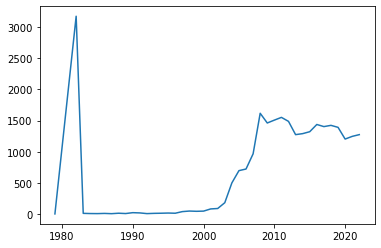

In [46]:
## Plotting number of aviation accidents over the years to see overall trend

incidents_by_year = airplane_data['Year'].value_counts().sort_index()

plt.plot(incidents_by_year.index, incidents_by_year.values)

Text(0, 0.5, 'Number of Incidents')

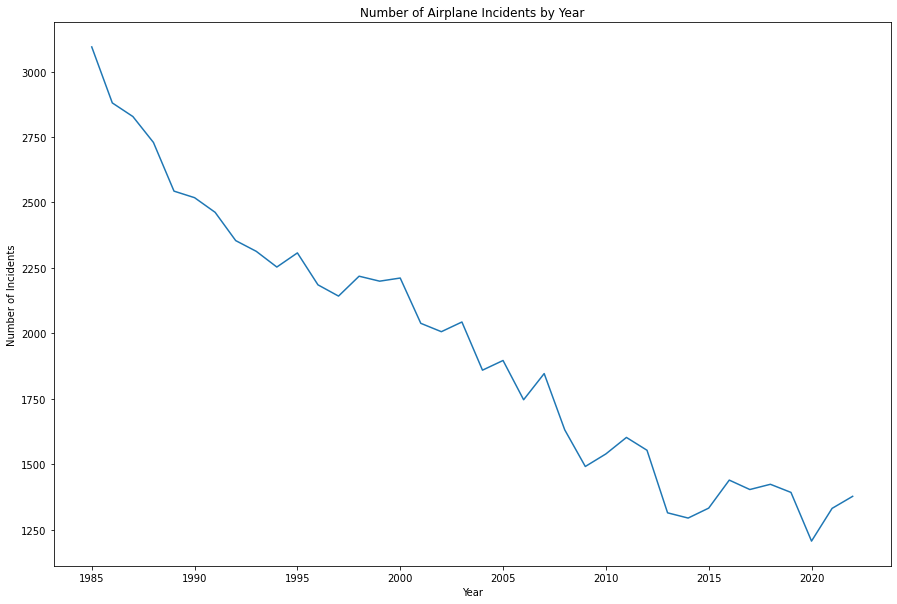

In [19]:
## Plotting again starting from 1985, no data available from before 1985

airplane_data_post1985 = airplane_data[airplane_data['Year'] >= 1985]
incidents_by_year = airplane_data_post1985['Year'].value_counts().sort_index()
plt.figure(figsize=(15, 10))
plt.plot(incidents_by_year.index, incidents_by_year.sort_index())
plt.title('Number of Airplane Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
 

In [47]:
#Deciding to work on only airplane data from 2013 onwards because overall trend of decreasing amounts of incidents per year seems to flatline at that time.
#Analysis after this point should be more aircraft specific instead of overall trend of increased safety.
airplane_data_modern = airplane_data[airplane_data['Year'] >= 2013].copy()
airplane_data_modern

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Year
73173,20130101X94035,Accident,WPR13CA079,2013-01-01,"Chiloquin, OR",United States,423428N,1215226W,2S7,Chiloquin State Airport,...,0.0,0.0,0.0,2.0,VMC,NaN,The flight instructors failure to maintain ai...,25-09-2020,1.0,2013.0
73174,20130102X03247,Accident,WPR13LA082,2013-01-02,"North Las Vegas, NV",United States,361238N,1151140W,VGT,North Las Vegas,...,0.0,0.0,0.0,2.0,VMC,NaN,The pilots failure to maintain an adequate de...,25-09-2020,1.0,2013.0
73176,20130102X72037,Accident,ERA13FA101,2013-01-02,"Jasper, AL",United States,335310N,0087190W,JFX,Walker County Airport,...,3.0,0.0,0.0,0.0,IMC,NaN,The student pilots poor judgment to take a mu...,25-09-2020,1.0,2013.0
73180,20130111X91754,Accident,CEN13LA127,2013-01-02,"Elkhart, IN",United States,413925N,0008625W,3C1,Mishawaka Pilots Club Airport,...,0.0,0.0,0.0,2.0,VMC,NaN,"The pilots improper flare, which resulted in ...",25-09-2020,1.0,2013.0
73181,20130102X04956,Accident,WPR13FA083,2013-01-03,"Oceano, CA",United States,035358N,0120376W,L52,Oceano County Airport,...,1.0,0.0,0.0,0.0,VMC,NaN,The pilots failure to maintain airplane contr...,NaN,1.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022,12.0,2022.0
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,12.0,2022.0
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022,12.0,2022.0
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022,12.0,2022.0


In [48]:
airplane_data_modern['Purpose.of.flight'].value_counts()

Personal                     7551
Instructional                1491
Aerial Application            445
Business                      285
Positioning                   162
Flight Test                   118
Unknown                       105
Aerial Observation             97
Other Work Use                 81
Skydiving                      61
Ferry                          49
Executive/corporate            43
Banner Tow                     42
Air Race show                  41
Public Aircraft - Federal      30
Glider Tow                     20
Firefighting                   12
Public Aircraft                10
Public Aircraft - State         8
Public Aircraft - Local         7
ASHO                            6
PUBS                            3
Air Drop                        2
Name: Purpose.of.flight, dtype: int64

In [49]:
#Cleaning Purpose.of.flight column leaving Personal untouched and changing all others to Commercial in order to make granularized recommendations for the business for Private vs. Commercial
airplane_data_modern.loc[airplane_data_modern['Purpose.of.flight'] != 'Personal', 'Purpose.of.flight'] = 'Commercial'
airplane_data_modern['Purpose.of.flight'].value_counts()

Personal      7551
Commercial    5711
Name: Purpose.of.flight, dtype: int64

In [60]:
### Adding a new column sum of total people uninjured, fatally injured, seriously injured, and sustaining minor injuries in order to find percentages of each later
airplane_data_modern['Total.People'] = airplane_data_modern[['Total.Fatal.Injuries', 'Total.Minor.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured']].sum(axis=1)


In [67]:
# Normalizing capitalization in strings in 'Make' column
airplane_data_modern['Make'] = airplane_data_modern['Make'].str.upper()

In [68]:
#Creating individual dataframes containing only private flight information and only commercial flight information
private_data = airplane_data_modern[airplane_data_modern['Purpose.of.flight'] == 'Personal'].copy()

In [70]:
commercial_data = airplane_data_modern[airplane_data_modern['Purpose.of.flight'] == 'Commercial'].copy()

# Analysis on number of engines:

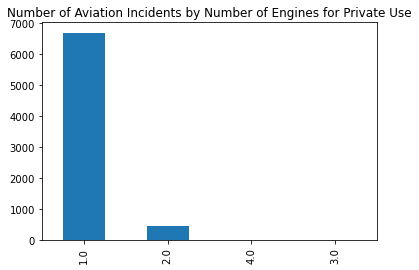

In [74]:
# Number of incidents by number of engines for private data
private_data['Number.of.Engines'].value_counts(sort=True).plot.bar(
    title = 'Number of Aviation Incidents by Number of Engines for Private Use');

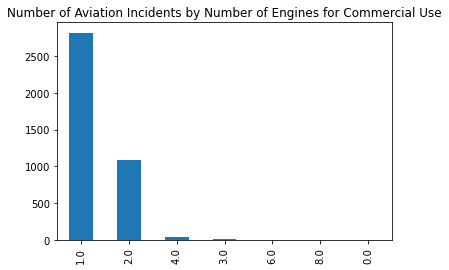

In [75]:
#Number of incidents by number of engines for commercial data
commercial_data['Number.of.Engines'].value_counts(sort=True).plot.bar(
    title = 'Number of Aviation Incidents by Number of Engines for Commercial Use');

## Conclusion for aviation safety and number of engines:

While the dataset is only on recorded incidents, the data suggests that having aircraft with more than 1 engine have fewer total number of incidents. This makes sense logically in having a backup engine
could potentially avoid an aviation accident.

# Analysis of data regarding Safety by Manufacturer

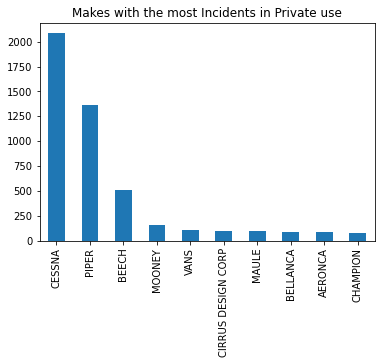

In [81]:
# Top 10 makes with incidents for Private Data
private_data['Make'].value_counts().head(10).plot(
    kind='bar',
    title= 'Makes with the most Incidents in Private use');

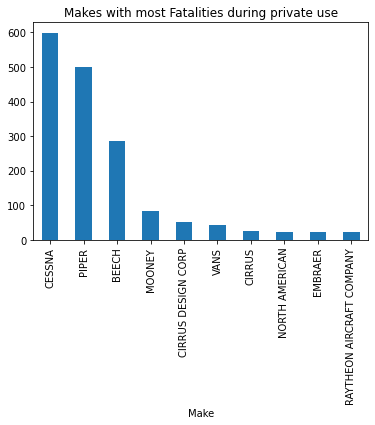

In [82]:
# Top 10 Fatalities by Make for Private Data
private_data.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10).plot(
    kind='bar',
    title= 'Makes with most Fatalities during private use');

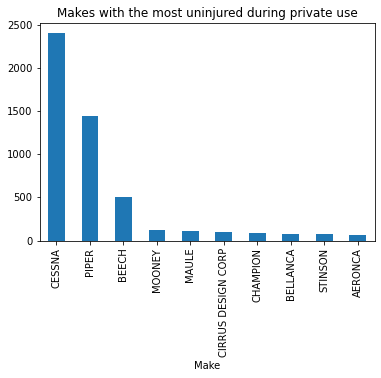

In [84]:
# Top 10 Uninjured by Make for Private Data
private_data.groupby('Make')['Total.Uninjured'].sum().sort_values(ascending=False).head(10).plot(
    kind='bar',
    title='Makes with the most uninjured during private use');

Because the data is only on accidents, seeing that Cessna leads in total Incidents, Fatalities, and Uninjured doesn't necessarily mean they're the most dangerous. They're probably just the most popular
manufacturer for airplanes in private use. Further drilling down to find ratios between total number of incidents vs. fatalities is necessary.

In [95]:
#Declaring variables of aggregated number of incidents and fatalities by manufacturer
total_accidents_priv = private_data.groupby('Make')['Event.Id'].count()
fatal_priv_agg = private_data.groupby('Make')['Total.Fatal.Injuries'].sum()


In [100]:
#Instantiating a new dataframe with these variables
priv_makes = pd.DataFrame(total_accidents_priv)
priv_makes['fatal_priv_agg'] = fatal_priv_agg
priv_makes.reset_index(inplace=True)
priv_makes.head()

,Make,Event.Id,fatal_priv_agg
0,177MF LLC,1,0.0
1,2021FX3 LLC,2,0.0
2,5 RIVERS LLC,1,0.0
3,781569 INC,1,0.0
4,AAA AIRCRAFT LLC,1,0.0


In [102]:
# Adding new column 'priv_fatality_ratio' which will be the total number of deaths by make over the total number of incidents per manufacturer.
priv_makes['priv_fatality_ratio'] = priv_makes['fatal_priv_agg']/priv_makes['Event.Id']
priv_makes.head()

,Make,Event.Id,fatal_priv_agg,priv_fatality_ratio
0,177MF LLC,1,0.0,0.0
1,2021FX3 LLC,2,0.0,0.0
2,5 RIVERS LLC,1,0.0,0.0
3,781569 INC,1,0.0,0.0
4,AAA AIRCRAFT LLC,1,0.0,0.0


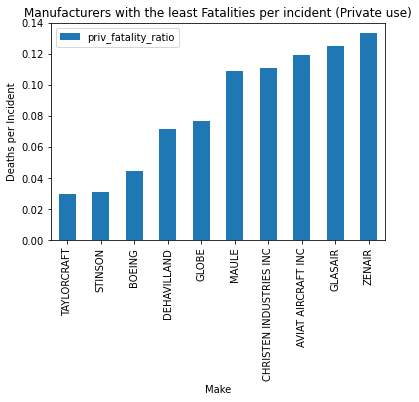

In [114]:
# Best Private Manufacturers should have the lowest ratio and Worst should have the highest
best_priv_makes = priv_makes[priv_makes['priv_fatality_ratio']>0].sort_values(['priv_fatality_ratio'], ascending=True).head(10) 
best_priv_makes.plot.bar(x='Make', y ='priv_fatality_ratio', title='Manufacturers with the least Fatalities per incident (Private use)', ylabel='Deaths per Incident');

# Conclusion
When looking at the rates of fatalities per incident, the safest 3 Manufacturers for private use are Taylorcraft, Stinson, and Boeing.

In [117]:
# I want to compare the top 3 safest manufacturers with the 3 most popular manufacturers based off representation in the data.
filtered_private = private_data[(private_data['Make']=='TAYLORCRAFT') |
                                (private_data['Make']=='STINSON') |
                                (private_data['Make']=='BOEING') |
                                (private_data['Make']=='CESSNA') |
                                (private_data['Make']=='PIPER') |
                                (private_data['Make']=='BEECH')
                                ]

In [120]:
# Getting the sum of all injury columns for each of the 6 Makes I want to compare
agg_filtered_private = filtered_private.groupby('Make')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].sum()

In [121]:
agg_filtered_private.head()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Make,,,,
BEECH,287.0,152.0,99.0,501.0
BOEING,2.0,13.0,5.0,53.0
CESSNA,599.0,517.0,274.0,2397.0
PIPER,499.0,316.0,276.0,1444.0
STINSON,2.0,25.0,11.0,72.0


In [122]:
agg_filtered_private.reset_index(inplace=True)

In [127]:
# Adding a column for each injury category that will be the percentage of total people from all injury types including uninjured
agg_filtered_private['total_fatal_pct'] = 100 * agg_filtered_private['Total.Fatal.Injuries'] / (agg_filtered_private['Total.Fatal.Injuries'] +
                                                                                                agg_filtered_private['Total.Serious.Injuries'] +
                                                                                                agg_filtered_private['Total.Minor.Injuries'] +
                                                                                                agg_filtered_private['Total.Uninjured'])
agg_filtered_private['total_serious_pct'] = 100 * agg_filtered_private['Total.Serious.Injuries'] / (agg_filtered_private['Total.Fatal.Injuries'] +
                                                                                                agg_filtered_private['Total.Serious.Injuries'] +
                                                                                                agg_filtered_private['Total.Minor.Injuries'] +
                                                                                                agg_filtered_private['Total.Uninjured'])
agg_filtered_private['total_minor_pct'] = 100 * agg_filtered_private['Total.Minor.Injuries'] / (agg_filtered_private['Total.Fatal.Injuries'] +
                                                                                                agg_filtered_private['Total.Serious.Injuries'] +
                                                                                                agg_filtered_private['Total.Minor.Injuries'] +
                                                                                                agg_filtered_private['Total.Uninjured'])
agg_filtered_private['total_uninjured_pct'] = 100 * agg_filtered_private['Total.Uninjured'] / (agg_filtered_private['Total.Fatal.Injuries'] +
                                                                                                agg_filtered_private['Total.Serious.Injuries'] +
                                                                                                agg_filtered_private['Total.Minor.Injuries'] +
                                                                                                agg_filtered_private['Total.Uninjured'])
agg_filtered_private

,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,total_fatal_pct,total_serious_pct,total_minor_pct,total_uninjured_pct
0,BEECH,287.0,152.0,99.0,501.0,27.622714,14.629451,9.528393,48.219442
1,BOEING,2.0,13.0,5.0,53.0,2.739726,17.808219,6.849315,72.602740
2,CESSNA,599.0,517.0,274.0,2397.0,15.817270,13.651967,7.235279,63.295485
3,PIPER,499.0,316.0,276.0,1444.0,19.684418,12.465483,10.887574,56.962525
4,STINSON,2.0,25.0,11.0,72.0,1.818182,22.727273,10.000000,65.454545
5,TAYLORCRAFT,1.0,9.0,4.0,31.0,2.222222,20.000000,8.888889,68.888889


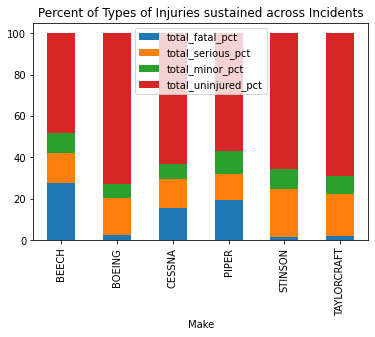

In [130]:
# Creating a stacked boxplot to compare the 3 safest private makes with the 3 most popular
ax = agg_filtered_private.plot(x='Make', y=['total_fatal_pct', 'total_serious_pct', 'total_minor_pct', 'total_uninjured_pct'], kind='bar', stacked=True,
                               title='Percent of Types of Injuries sustained across Incidents')

Here we can see how the 3 safest private airplane makes (Taylorcraft, Stinson, and Boeing) compare to the 3 most popular (Cessna, Piper, and Beech)

# The Same analysis for Planes in Commercial use:

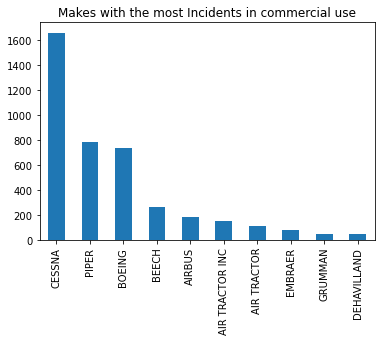

In [132]:
# Top 10 makes with incidents in Commercial Data
commercial_data['Make'].value_counts().head(10).plot(kind='bar', title='Makes with the most Incidents in commercial use');

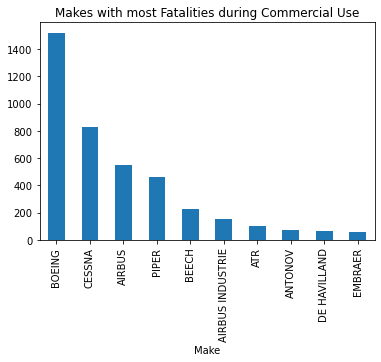

In [134]:
# Top 10 Fatalities by Make for Commercial Data
commercial_data.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Makes with most Fatalities during Commercial Use');

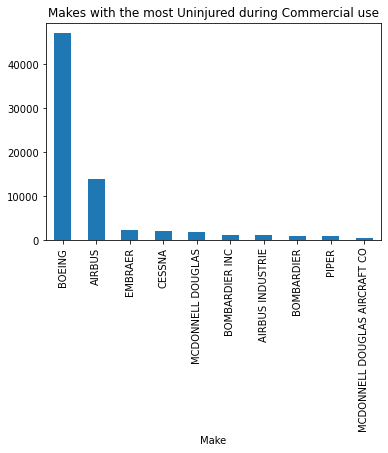

In [136]:
# Top 10 Uninjured by Make 
commercial_data.groupby('Make')['Total.Uninjured'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Makes with the most Uninjured during Commercial use');

# Conclusion
Cessna again has the most data points for incidents in Commercial Use but Boeing the most fatalities. 
Drilling down further with the same methods used in private use aircraft will determine if it's just an overrepresentaion of Boeing aircraft in Commercial incidents or perhaps the size of the
aircraft leading to a high number of Fatalities (or Uninjured) during an incident.

In [137]:
#Declaring variables of aggregated number of incidents and fatalities by manufacturer
total_accidents_comm = commercial_data.groupby('Make')['Event.Id'].count()
fatal_comm_agg = commercial_data.groupby('Make')['Total.Fatal.Injuries'].sum()

In [138]:
#Instantiating a new dataframe with these variables
comm_makes = pd.DataFrame(total_accidents_comm)
comm_makes['fatal_comm_agg'] = fatal_comm_agg
comm_makes.reset_index(inplace=True)
comm_makes.head()

,Make,Event.Id,fatal_comm_agg
0,3XTRIM,1,1.0
1,737,2,0.0
2,777,1,0.0
3,ACRODUSTER,1,1.0
4,ADOLPHSON,1,0.0


In [139]:
# Adding new column 'comm_fatality_ratio' which will be the total number of deaths by make over the total number of incidents per manufacturer.
comm_makes['comm_fatality_ratio'] = comm_makes['fatal_comm_agg']/comm_makes['Event.Id']
comm_makes.head()

,Make,Event.Id,fatal_comm_agg,comm_fatality_ratio
0,3XTRIM,1,1.0,1.0
1,737,2,0.0,0.0
2,777,1,0.0,0.0
3,ACRODUSTER,1,1.0,1.0
4,ADOLPHSON,1,0.0,0.0


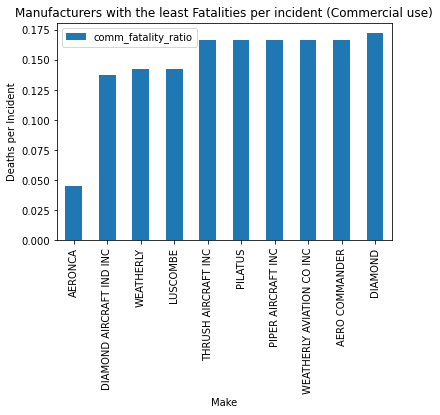

In [140]:
# Best Commercial Manufacturers should have the lowest ratio and Worst should have the highest
best_comm_makes = comm_makes[comm_makes['comm_fatality_ratio']>0].sort_values(['comm_fatality_ratio'], ascending=True).head(10) 
best_comm_makes.plot.bar(x='Make', y ='comm_fatality_ratio', title='Manufacturers with the least Fatalities per incident (Commercial use)', ylabel='Deaths per Incident');

# Conclusion
When looking at the rates of fatalities per incident, the 3 Manufacturers with the least number of fatalities per incident are Aeronca, Diamond Aircraft Ind Inc and Weatherly.

In [141]:
# I want to compare the top 3 safest manufacturers with the 3 most popular manufacturers based off representation in the data.
filtered_commercial = commercial_data[(commercial_data['Make']=='AERONCA') |
                                (commercial_data['Make']=='DIAMOND AIRCRAFT IND INC') |
                                (commercial_data['Make']=='WEATHERLY') |
                                (commercial_data['Make']=='CESSNA') |
                                (commercial_data['Make']=='BOEING') |
                                (commercial_data['Make']=='AIRBUS')
                                ]

In [142]:
# Getting the sum of all injury columns for each of the 6 Makes I want to compare
agg_filtered_commercial = filtered_commercial.groupby('Make')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].sum()

In [146]:

agg_filtered_commercial.reset_index(inplace=True)


In [147]:
# Adding a column for each injury category that will be the percentage of total people from all injury types including uninjured
agg_filtered_commercial['total_fatal_pct'] = 100 * agg_filtered_commercial['Total.Fatal.Injuries'] / (agg_filtered_commercial['Total.Fatal.Injuries'] +
                                                                                                agg_filtered_commercial['Total.Serious.Injuries'] +
                                                                                                agg_filtered_commercial['Total.Minor.Injuries'] +
                                                                                                agg_filtered_commercial['Total.Uninjured'])
agg_filtered_commercial['total_serious_pct'] = 100 * agg_filtered_commercial['Total.Serious.Injuries'] / (agg_filtered_commercial['Total.Fatal.Injuries'] +
                                                                                                agg_filtered_commercial['Total.Serious.Injuries'] +
                                                                                                agg_filtered_commercial['Total.Minor.Injuries'] +
                                                                                                agg_filtered_commercial['Total.Uninjured'])
agg_filtered_commercial['total_minor_pct'] = 100 * agg_filtered_commercial['Total.Minor.Injuries'] / (agg_filtered_commercial['Total.Fatal.Injuries'] +
                                                                                                agg_filtered_commercial['Total.Serious.Injuries'] +
                                                                                                agg_filtered_commercial['Total.Minor.Injuries'] +
                                                                                                agg_filtered_commercial['Total.Uninjured'])
agg_filtered_commercial['total_uninjured_pct'] = 100 * agg_filtered_commercial['Total.Uninjured'] / (agg_filtered_commercial['Total.Fatal.Injuries'] +
                                                                                                agg_filtered_commercial['Total.Serious.Injuries'] +
                                                                                                agg_filtered_commercial['Total.Minor.Injuries'] +
                                                                                                agg_filtered_commercial['Total.Uninjured'])
agg_filtered_commercial

,level_0,index,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,total_fatal_pct,total_serious_pct,total_minor_pct,total_uninjured_pct
0,0,0,AERONCA,1.0,9.0,3.0,27.0,2.500000,22.500000,7.500000,67.500000
1,1,1,AIRBUS,551.0,134.0,33.0,13847.0,3.783042,0.920014,0.226571,95.070374
2,2,2,BOEING,1521.0,659.0,204.0,47133.0,3.071672,1.330856,0.411980,95.185492
3,3,3,CESSNA,827.0,432.0,284.0,2142.0,22.442334,11.723202,7.706920,58.127544
4,4,4,DIAMOND AIRCRAFT IND INC,4.0,5.0,4.0,33.0,8.695652,10.869565,8.695652,71.739130
5,5,5,WEATHERLY,1.0,0.0,0.0,6.0,14.285714,0.000000,0.000000,85.714286


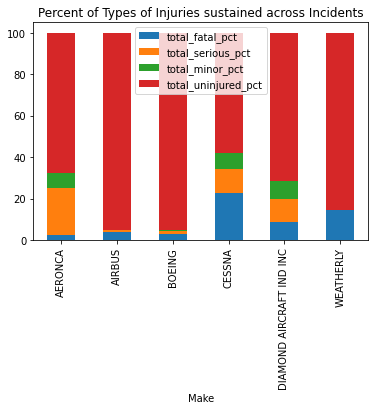

In [148]:
# Creating a stacked boxplot to compare the 3 safest private makes with the 3 most popular
ax = agg_filtered_commercial.plot(x='Make', y=['total_fatal_pct', 'total_serious_pct', 'total_minor_pct', 'total_uninjured_pct'], kind='bar', stacked=True,
                               title='Percent of Types of Injuries sustained across Incidents')

# Conclusion
While Aeronca, Diamond Aicraft Ind Inc, and Weatherly have the lowest fatality rate per incident, they have a higher percent of serious and minor injuries sustained per incident.
Boeing and Airbus have much higher percentage of totally uninjured people during accidents than the other 4 manufacturers represented. In fact for commercial use I recommend Boeing and Airbus a close 2nd. 
Boeing has a fatality percent of only 3.1% and airbus only 3.8. Both share an uninjured percent of 95%. The other manufacturers have lower uninjured percent and more serious and minor injuries Sustained. 

If the company is looking to become a commercial airliner like Delta or United, Beoing and Airbus are also the only jumbo jet manufacturers represented so Boeing is the clear Recommendation.

In [149]:
# Sending Data to Excel for Tableau for Commercial and Private Dataframe 
commercial_data.to_csv("commercial_data.csv")
private_data.to_csv("private_data.csv")
best_comm_makes.to_csv('best_comm_makes.csv')
best_priv_makes.to_csv('best_priv_makes.csv')
agg_filtered_commercial.to_csv('agg_filtered_commercial.csv')
agg_filtered_private.to_csv('agg_filtered_private.csv')
